In [11]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [12]:
class CIFAR10Data(object):
    def __init__(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = cifar10.load_data()
        self.classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        print('CIFAR10 Training data shape:', self.x_train.shape)
        print('CIFAR10 Training label shape', self.y_train.shape)
        print('CIFAR10 Test data shape', self.x_test.shape)
        print('CIFAR10 Test label shape', self.y_test.shape)

    def get_stretch_data(self, subtract_mean=True):
        num_classes = len(self.classes)
       
        x_train = np.reshape(self.x_train, (self.x_train.shape[0], -1)).astype('float16')
        y_train = keras.utils.to_categorical(self.y_train, num_classes)
        x_test = np.reshape(self.x_test, (self.x_test.shape[0], -1)).astype('float16')
        y_test = keras.utils.to_categorical(self.y_test, num_classes)

        if subtract_mean:
            mean_image = np.mean(x_train, axis=0).astype('uint8')
            x_train -= mean_image
            x_test -= mean_image

        return x_train, y_train, x_test, y_test

    def get_data(self, subtract_mean=True, output_shape=None):
        num_classes = len(self.classes)
        x_train = self.x_train
        x_test = self.x_test
        x_train = x_train.astype('float16')
        y_train = keras.utils.to_categorical(self.y_train, num_classes)

        x_test = x_test.astype('float16')
        y_test = keras.utils.to_categorical(self.y_test, num_classes)

        if subtract_mean:
            mean_image = np.mean(x_train, axis=0)
            x_train -= mean_image
            x_test -= mean_image
        return x_train, y_train, x_test, y_test


def plot_cifar10(cifar_data, num_sample_per_class):
    num_classes = len(cifar_data.classes)

    plt.figure()
    for y, cls in enumerate(cifar_data.classes):
        cls_indices = np.flatnonzero(cifar_data.y_train == y)
        samples_indices = np.random.choice(cls_indices, num_sample_per_class, replace=False)
        samples = cifar_data.x_train[samples_indices]
        for x, sample in enumerate(samples):
            # subplot index count from 1
            plt_idx = x * num_classes + y + 1
            plt.subplot(num_sample_per_class, num_classes, plt_idx)
            plt.imshow(sample)
            plt.axis('off')
            if x == 0:
                plt.title(cls)
    plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import initializers


def svm(classes, input_shape, weight_decay):
    model = Sequential()
    model.add(Dense(classes,
                    input_shape=input_shape,
                    kernel_regularizer=regularizers.l2(weight_decay),
                    kernel_initializer=initializers.random_normal(stddev=1e-3),
                    use_bias=True,
                    ))
    return model

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


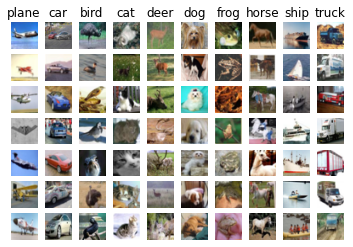

In [14]:
cifar10_data = CIFAR10Data()
plot_cifar10(cifar10_data, 7)
x_train, y_train, x_test, y_test = cifar10_data.get_stretch_data(subtract_mean=True)
num_training = 5000

mask = list(range(num_training))
x_small_train = x_train[mask]
y_small_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_small_test = x_train[mask]
y_small_test = y_test[mask]


num_classes = 10
N, D = x_train.shape

In [15]:
svm_model = svm(classes=num_classes, input_shape=(D, ), weight_decay=9e3)

svm_model.compile(optimizer=SGD(lr=1.6e-7),
                  loss=tf.keras.losses.categorical_hinge,
                  metrics=['accuracy'],
                  )
svm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = svm_model.fit(x_train, y_train,
                        epochs=10, batch_size=200,
                        validation_split=0.1, shuffle=False,
                        )


Epoch 1/10
225/225 [==============================] - 1s 2ms/step - loss: 160.0564 - accuracy: 0.1536 - val_loss: 77.9060 - val_accuracy: 0.2044
Epoch 2/10
225/225 [==============================] - 0s 2ms/step - loss: 44.0884 - accuracy: 0.2246 - val_loss: 21.8687 - val_accuracy: 0.2568
Epoch 3/10
225/225 [==============================] - 0s 2ms/step - loss: 12.6928 - accuracy: 0.2743 - val_loss: 6.6649 - val_accuracy: 0.2948
Epoch 4/10
225/225 [==============================] - 0s 2ms/step - loss: 4.1726 - accuracy: 0.3071 - val_loss: 2.5392 - val_accuracy: 0.3134
Epoch 5/10
225/225 [==============================] - 0s 2ms/step - loss: 1.8637 - accuracy: 0.3295 - val_loss: 1.4229 - val_accuracy: 0.3360
Epoch 6/10
225/225 [==============================] - 1s 2ms/step - loss: 1.2465 - accuracy: 0.3340 - val_loss: 1.1347 - val_accuracy: 0.3144
Epoch 7/10
225/225 [==============================] - 0s 2ms/step - loss: 1.0867 - accuracy: 0.3326 - val_loss: 1.0590 - val_accuracy: 0.3104


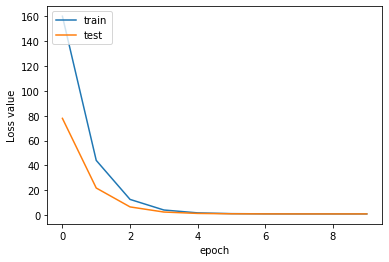

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

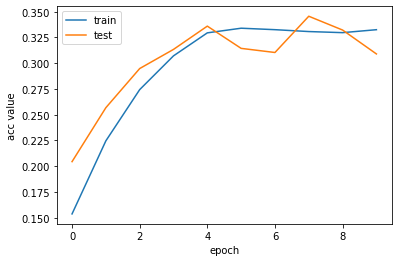

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:
# evalute SVM model
loss, acc = svm_model.evaluate(x_test, y_test)
print('evaluate loss:%f acc:%f' % (loss, acc))

313/313 [==============================] - 0s 628us/step - loss: 1.0358 - accuracy: 0.3006
evaluate loss:1.035801 acc:0.300600


In [20]:
history.history.keys()
svm_model.save('saved_model/svm')

INFO:tensorflow:Assets written to: saved_model/svm\assets
